In [2]:
import pandas as pd
import numpy as np
import time
import scipy
# import scipy
import matplotlib as mlt
import os
import json
import csv


## data cleaning 

In [3]:
#import crime data
#crime = pd.read_csv('/Users/csy/Desktop/618_project_part1/data/crime_data_w_population_and_crime_rate.csv')
crime = pd.read_csv('/Users/csy/Desktop/618_project_part1/data/UCR_2016/DS0001/37059-0001-Data.tsv',sep='\t')

#import population data
pop = pd.read_excel('/Users/csy/Desktop/618_project_part1/data/PopulationEstimates.xls', sheet_name='Population Estimates 2010-19', skiprows=2,dtype={'FIPStxt':str})
#import unemployment data
unemployment = pd.read_excel('/Users/csy/Desktop/618_project_part1/data/Unemployment.xlsx',sheet_name= 'Unemployment Med HH Income', skiprows=4)
#import income and poverty data
income = pd.read_excel('/Users/csy/Desktop/618_project_part1/data/est16all.xls',sheet_name= 'est16ALL', skiprows=3)


In [4]:
pop.rename(columns= {'Area_Name':'County','FIPStxt':'FIPS'}, inplace=True)
pop=pop[['State','County','FIPS','POP_ESTIMATE_2016']]

In [5]:
income=income[['Postal Code','Name','Poverty Estimate, All Ages','Poverty Percent, All Ages','Median Household Income']]
income.rename (columns= {'Name':'County','Postal Code':'State'}, inplace=True)

In [6]:
def fun_st(x):
     if len(str(x)) == 2:
         return str(x)
     else:
         return "0" + str(x)

def fun_cty(x):
     if len(str(x)) == 3:
         return str(x)
     elif len(str(x)) == 2:
         return "0" + str(x)
     else:
        return "00" + str(x)


crime["FIPS_ST"]= crime["FIPS_ST"].apply(lambda x:fun_st(x)).apply(str)
crime["FIPS_CTY"]= crime["FIPS_CTY"].apply(lambda x:fun_cty(x)).apply(str)
crime["FIPS"] = crime["FIPS_ST"] + crime["FIPS_CTY"]
crime.head()

,STUDYNO,EDITION,PART,IDNO,FIPS_ST,FIPS_CTY,CPOPARST,AG_ARRST,JURFLAG,COVIND,...,DUI,LIQUOR,DRUNK,DISORDR,VAGRANT,ALLOTHR,SUSPICN,CURFEW,RUNAWAY,FIPS
0,9999,1,1,1,01,001,57135,3,1,98.5035,...,130,19,110,34,0,1168,0,0,0,01001
1,9999,1,1,2,01,003,207584,14,0,96.2812,...,725,660,766,132,1,7625,0,0,0,01003
2,9999,1,1,3,01,005,26259,5,0,91.3039,...,60,4,55,21,0,263,0,0,0,01005
3,9999,1,1,4,01,007,22535,4,1,90.4619,...,66,15,9,12,0,373,0,0,0,01007
4,9999,1,1,5,01,009,57565,6,0,97.7122,...,83,18,81,12,0,1164,0,0,0,01009


In [7]:
crime.drop_duplicates(subset='FIPS', keep='first', inplace=True)
crime['FIPS']=crime['FIPS'].astype(object)
crime=crime[['FIPS','GRNDTOT','P1VLNT','P1PRPTY','MURDER','RAPE','ROBBERY','AGASSLT','OTHASLT','BURGLRY','LARCENY','FRAUD','WEAPONS','DRUGTOT','DRGSALE']]

## merge datasets

In [8]:
df_c_p=pd.merge(crime, pop,on =['FIPS'], how ='inner')
df_c_p.shape

(3141, 18)

In [9]:
unemployment=unemployment[['State','Area_name','Unemployed_2016','Employed_2016','Unemployment_rate_2016']]

In [10]:
unemployment['County']= unemployment['Area_name'].str.split(',', 1, expand=True)[0]
unemployment.rename (columns= {'Area_name':'county_name'}, inplace=True)

In [11]:
unemployment.drop(unemployment.loc[unemployment['State']=='US'].index, inplace=True)
unemployment.head()

,State,county_name,Unemployed_2016,Employed_2016,Unemployment_rate_2016,County
1,AL,Alabama,126572.0,2029157.0,5.9,Alabama
2,AL,"Autauga County, AL",1315.0,24395.0,5.1,Autauga County
3,AL,"Baldwin County, AL",4806.0,84972.0,5.4,Baldwin County
4,AL,"Barbour County, AL",696.0,7638.0,8.4,Barbour County
5,AL,"Bibb County, AL",553.0,7986.0,6.5,Bibb County


In [12]:
#df=crime.merge(unemployment,on =['county','state'], how ='inner')
df=pd.merge(df_c_p, unemployment,on =['County','State'], how ='inner')
df=pd.merge(df, income, on =['County','State'], how='inner')
df

,FIPS,GRNDTOT,P1VLNT,P1PRPTY,MURDER,RAPE,ROBBERY,AGASSLT,OTHASLT,BURGLRY,...,State,County,POP_ESTIMATE_2016,county_name,Unemployed_2016,Employed_2016,Unemployment_rate_2016,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income
0,01001,2796,68,356,7,4,14,43,325,30,...,AL,Autauga County,55243,"Autauga County, AL",1315.0,24395.0,5.1,7444,13.5,54487
1,01003,14765,491,1257,7,35,130,318,1267,178,...,AL,Baldwin County,207601,"Baldwin County, AL",4806.0,84972.0,5.4,24005,11.7,56460
2,01005,881,49,174,4,1,16,28,123,49,...,AL,Barbour County,25806,"Barbour County, AL",696.0,7638.0,8.4,6787,29.9,32884
3,01007,751,36,60,0,7,4,25,95,14,...,AL,Bibb County,22586,"Bibb County, AL",553.0,7986.0,6.5,4099,20.1,43079
4,01009,2172,108,190,3,2,14,89,214,31,...,AL,Blount County,57494,"Blount County, AL",1319.0,23061.0,5.4,8033,14.1,47213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,56037,1966,53,269,2,5,2,44,177,19,...,WY,Sweetwater County,44222,"Sweetwater County, WY",1346.0,20794.0,6.1,4264,9.8,74546
3120,56039,1026,23,63,0,2,0,20,27,5,...,WY,Teton County,23234,"Teton County, WY",532.0,14715.0,3.5,1680,7.3,84118
3121,56041,780,12,66,1,0,0,11,53,9,...,WY,Uinta County,20682,"Uinta County, WY",550.0,8876.0,5.8,2183,10.6,64713
3122,56043,93,1,2,0,0,0,1,3,1,...,WY,Washakie County,8165,"Washakie County, WY",201.0,4013.0,4.8,1060,13.1,49533


In [13]:
df.rename (columns= {'GRNDTOT':'Total Crimes','P1VLNT':'violent crimes','P1PRPTY':'property crimes','FRAUD':'fraud','MURDER':'murder'}, inplace=True)
df.rename (columns= {'Unemployment_rate_2016':'Unemployment Rate','Poverty Percent, All Ages':'Poverty Percent','POP_ESTIMATE_2016':'Population'}, inplace=True)

df['assult']=df['AGASSLT'] +df['OTHASLT']
df['robbery'] = df['ROBBERY']+df['BURGLRY']+df['LARCENY']
df['drugs'] = df['DRUGTOT'] +df['DRGSALE'] 

In [14]:
df1=df[['FIPS','County','State',
       'Total Crimes','Population', 'Median Household Income', 'Unemployment Rate','Poverty Percent',
       'violent crimes','property crimes','assult','robbery','murder','fraud','drugs'
      ]]

In [15]:
df1

,FIPS,County,State,Total Crimes,Population,Median Household Income,Unemployment Rate,Poverty Percent,violent crimes,property crimes,assult,robbery,murder,fraud,drugs
0,01001,Autauga County,AL,2796,55243,54487,5.1,13.5,68,356,368,357,7,82,340
1,01003,Baldwin County,AL,14765,207601,56460,5.4,11.7,491,1257,1585,1351,7,337,816
2,01005,Barbour County,AL,881,25806,32884,8.4,29.9,49,174,151,181,4,18,59
3,01007,Bibb County,AL,751,22586,43079,6.5,20.1,36,60,120,56,0,9,29
4,01009,Blount County,AL,2172,57494,47213,5.4,14.1,108,190,303,181,3,64,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,56037,Sweetwater County,WY,1966,44222,74546,6.1,9.8,53,269,221,259,2,8,307
3120,56039,Teton County,WY,1026,23234,84118,3.5,7.3,23,63,47,24,0,4,194
3121,56041,Uinta County,WY,780,20682,64713,5.8,10.6,12,66,64,66,1,7,142
3122,56043,Washakie County,WY,93,8165,49533,4.8,13.1,1,2,4,2,0,0,31


In [16]:
print(df['Median Household Income'].isnull().value_counts())
print(df['Poverty Percent'].isnull().value_counts())

False    3124
Name: Median Household Income, dtype: int64
False    3124
Name: Poverty Percent, dtype: int64


In [17]:
df1["Median Household Income"] = df1["Median Household Income"].apply(lambda x:int(x))

/Users/csy/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df1["Poverty Percent"] = df1["Poverty Percent"].apply(lambda x:float(x))

/Users/csy/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df1.head()

,FIPS,County,State,Total Crimes,Population,Median Household Income,Unemployment Rate,Poverty Percent,violent crimes,property crimes,assult,robbery,murder,fraud,drugs
0,01001,Autauga County,AL,2796,55243,54487,5.1,13.5,68,356,368,357,7,82,340
1,01003,Baldwin County,AL,14765,207601,56460,5.4,11.7,491,1257,1585,1351,7,337,816
2,01005,Barbour County,AL,881,25806,32884,8.4,29.9,49,174,151,181,4,18,59
3,01007,Bibb County,AL,751,22586,43079,6.5,20.1,36,60,120,56,0,9,29
4,01009,Blount County,AL,2172,57494,47213,5.4,14.1,108,190,303,181,3,64,146


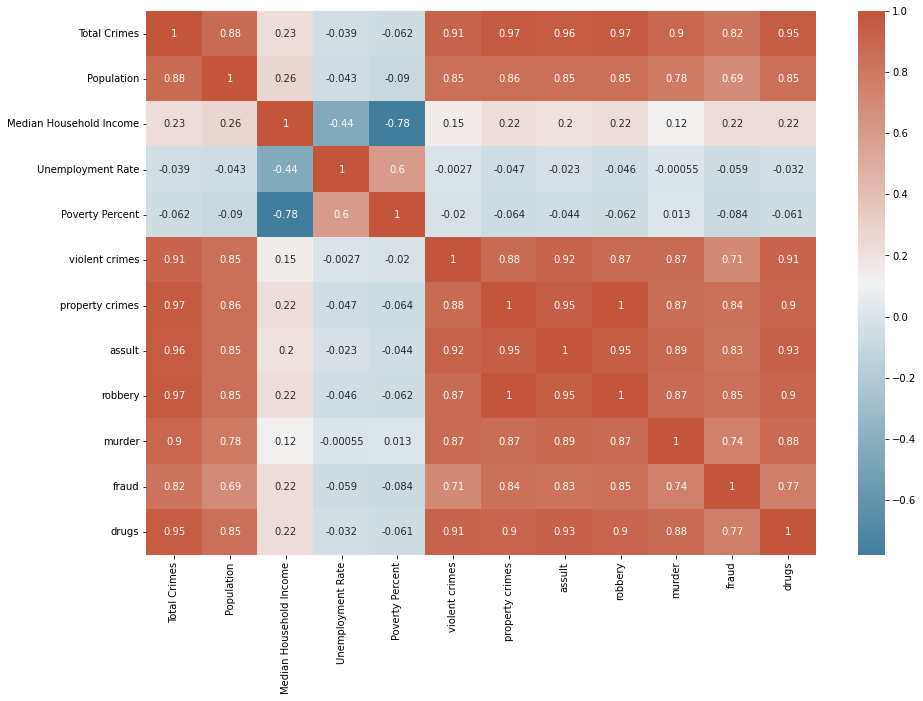

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


df_c=df1[['Total Crimes','Population','Median Household Income', 'Unemployment Rate','Poverty Percent','violent crimes','property crimes','assult','robbery','murder','fraud','drugs']]


corr = df_c.corr()
#
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(15, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

## generate new variables

In [21]:
# calcaute rate for crime data by dividing population 
df1['Crimes Rate'] = round((df1['Total Crimes']/df1['Population']) *10000,2)
df1['violent crimes rate'] = round((df1['violent crimes']/df1['Population']) *10000,2)
df1['property crimes rate'] = round((df1['property crimes']/df1['Population']) *10000,2)
df1['assult rate'] = round((df1['assult']/df1['Population']) *10000,2)
df1['robbery rate'] = round((df1['robbery']/df1['Population']) *10000,2)
df1['murder rate'] = round((df1['murder']/df1['Population']) *10000,2)
df1['fraud rate'] = round((df1['fraud']/df1['Population']) *10000,2)
df1['drugs rate'] = round((df1['drugs']/df1['Population']) *10000,2)
    

/Users/csy/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/csy/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/csy/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [22]:
df1.to_csv("all.csv")

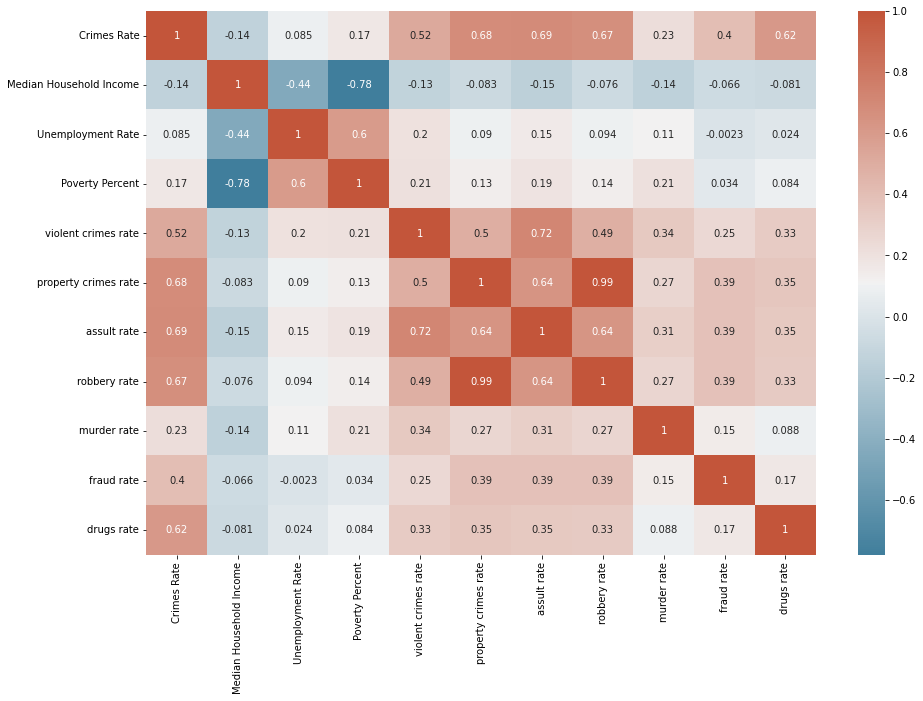

In [23]:
df_c1=df1[['Crimes Rate','Median Household Income', 'Unemployment Rate','Poverty Percent','violent crimes rate',
           'property crimes rate','assult rate','robbery rate','murder rate','fraud rate','drugs rate']]


corr = df_c1.corr()
#
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(15, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

In [24]:
# correlation analysis 
scipy.stats.pearsonr(df_c1['drugs rate'], df_c1['Median Household Income'])

(-0.08095716746364984, 5.8831439662668155e-06)

In [25]:
# correlation analysis
scipy.stats.pearsonr(df_c1['Crimes Rate'], df_c1['Median Household Income'])

(-0.1361992956956645, 2.0869081023615206e-14)

In [26]:
df1.head()

,FIPS,County,State,Total Crimes,Population,Median Household Income,Unemployment Rate,Poverty Percent,violent crimes,property crimes,...,fraud,drugs,Crimes Rate,violent crimes rate,property crimes rate,assult rate,robbery rate,murder rate,fraud rate,drugs rate
0,01001,Autauga County,AL,2796,55243,54487,5.1,13.5,68,356,...,82,340,506.13,12.31,64.44,66.61,64.62,1.27,14.84,61.55
1,01003,Baldwin County,AL,14765,207601,56460,5.4,11.7,491,1257,...,337,816,711.22,23.65,60.55,76.35,65.08,0.34,16.23,39.31
2,01005,Barbour County,AL,881,25806,32884,8.4,29.9,49,174,...,18,59,341.39,18.99,67.43,58.51,70.14,1.55,6.98,22.86
3,01007,Bibb County,AL,751,22586,43079,6.5,20.1,36,60,...,9,29,332.51,15.94,26.57,53.13,24.79,0.00,3.98,12.84
4,01009,Blount County,AL,2172,57494,47213,5.4,14.1,108,190,...,64,146,377.78,18.78,33.05,52.70,31.48,0.52,11.13,25.39


In [27]:
# generate Lethal Crime Rate
df1['Lethal Crime Rate'] = ((df1['violent crimes'] +df1['murder'])/df1['Population']) 
df1

/Users/csy/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FIPS,County,State,Total Crimes,Population,Median Household Income,Unemployment Rate,Poverty Percent,violent crimes,property crimes,...,drugs,Crimes Rate,violent crimes rate,property crimes rate,assult rate,robbery rate,murder rate,fraud rate,drugs rate,Lethal Crime Rate
0,01001,Autauga County,AL,2796,55243,54487,5.1,13.5,68,356,...,340,506.13,12.31,64.44,66.61,64.62,1.27,14.84,61.55,0.001358
1,01003,Baldwin County,AL,14765,207601,56460,5.4,11.7,491,1257,...,816,711.22,23.65,60.55,76.35,65.08,0.34,16.23,39.31,0.002399
2,01005,Barbour County,AL,881,25806,32884,8.4,29.9,49,174,...,59,341.39,18.99,67.43,58.51,70.14,1.55,6.98,22.86,0.002054
3,01007,Bibb County,AL,751,22586,43079,6.5,20.1,36,60,...,29,332.51,15.94,26.57,53.13,24.79,0.00,3.98,12.84,0.001594
4,01009,Blount County,AL,2172,57494,47213,5.4,14.1,108,190,...,146,377.78,18.78,33.05,52.70,31.48,0.52,11.13,25.39,0.001931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,56037,Sweetwater County,WY,1966,44222,74546,6.1,9.8,53,269,...,307,444.58,11.98,60.83,49.98,58.57,0.45,1.81,69.42,0.001244
3120,56039,Teton County,WY,1026,23234,84118,3.5,7.3,23,63,...,194,441.59,9.90,27.12,20.23,10.33,0.00,1.72,83.50,0.000990
3121,56041,Uinta County,WY,780,20682,64713,5.8,10.6,12,66,...,142,377.14,5.80,31.91,30.94,31.91,0.48,3.38,68.66,0.000629
3122,56043,Washakie County,WY,93,8165,49533,4.8,13.1,1,2,...,31,113.90,1.22,2.45,4.90,2.45,0.00,0.00,37.97,0.000122


## State-level Data Visualizaiton 

In [28]:
f = {'Crimes Rate':['mean'], 'Median Household Income':['mean'],'Unemployment Rate':['mean'],'Total Crimes':['sum'], 'violent crimes':['sum'],'property crimes':['sum'],
    'assult':['sum'], 'robbery':['sum'], 'murder':['sum'], 'fraud':['sum'], 'drugs':['sum'],'Lethal Crime Rate':['mean'] ,'drugs rate':['mean']}


df_state= df1.groupby('State').agg(f).reset_index()
df_state.head()

,State,Crimes Rate,Median Household Income,Unemployment Rate,Total Crimes,violent crimes,property crimes,assult,robbery,murder,fraud,drugs,Lethal Crime Rate,drugs rate
,,mean,mean,mean,sum,sum,sum,sum,sum,sum,sum,sum,mean,mean
0,AK,273.809130,59863.652174,9.691304,8191,472,1060,1699,964,7,53,455,0.001927,13.662609
1,AL,377.890746,40636.447761,6.704478,178901,7629,21257,26390,21523,388,4371,13570,0.001724,30.016567
2,AR,337.945067,39233.720000,4.622667,143972,5202,15403,17079,15423,148,1203,19306,0.001476,55.514533
3,AZ,429.279333,45738.200000,7.773333,250609,10247,39613,33754,39692,241,2045,34809,0.001512,68.877333
4,CA,387.347193,60211.807018,7.014035,1112074,105387,114497,165595,110365,1394,6307,245691,0.003419,85.098772


In [29]:
df_state=df_state.droplevel(1, axis=1)

In [30]:
df_state.sort_values(by='Crimes Rate', ascending=False, inplace=True)

In [31]:
df_state.set_index(['State'],inplace=True)

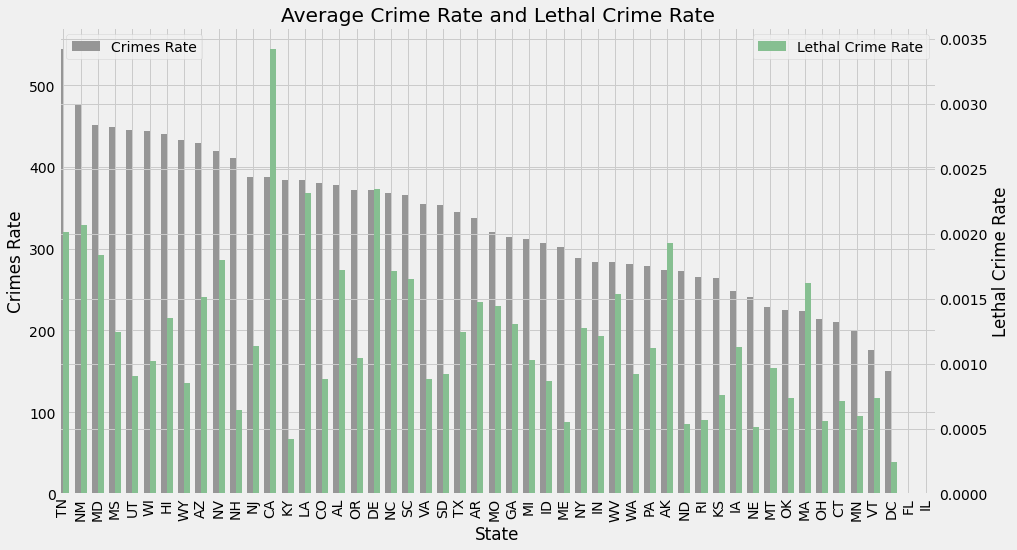

In [32]:
mlt.style.use('fivethirtyeight') 

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.35

df_state['Crimes Rate'].plot(kind='bar',  ax=ax, width=width, color='#969696', figsize=(14, 8),position=1)
df_state['Lethal Crime Rate'].plot(kind='bar', ax=ax2, width=width,color='#86bf91', figsize=(14, 8),position=0)

ax.set_ylabel('Crimes Rate')
ax2.set_ylabel('Lethal Crime Rate')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_title('Average Crime Rate and Lethal Crime Rate')
plt.show()




Text(0, 0.5, 'Total Numbers of Crimes')

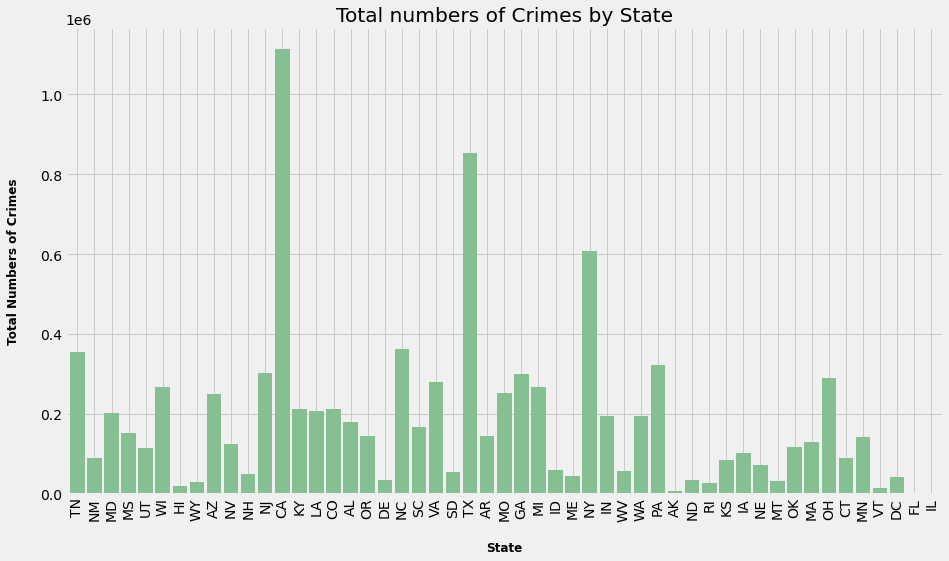

In [33]:
mlt.style.use('fivethirtyeight') 

# numbers of crimes 
ax=df_state['Total Crimes'].plot(kind='bar', figsize=(14, 8), color='#86bf91', zorder=2, width=0.85)

ax.set_title("Total numbers of Crimes by State")
ax.set_xlabel("State", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Total Numbers of Crimes", labelpad=20, weight='bold', size=12)


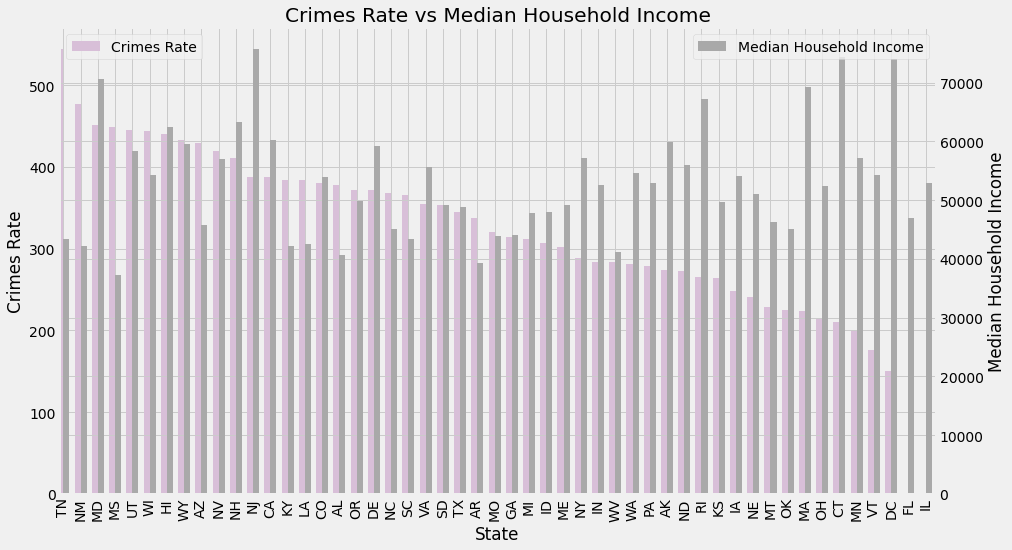

In [34]:


fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.35

df_state['Crimes Rate'].plot(kind='bar',  ax=ax, width=width, color='thistle', figsize=(14, 14),position=1)
df_state['Median Household Income'].plot(kind='bar', ax=ax2, width=width,color='darkgray', figsize=(14, 8),position=0)

ax.set_ylabel('Crimes Rate')
ax2.set_ylabel('Median Household Income')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_title('Crimes Rate vs Median Household Income')
plt.show()

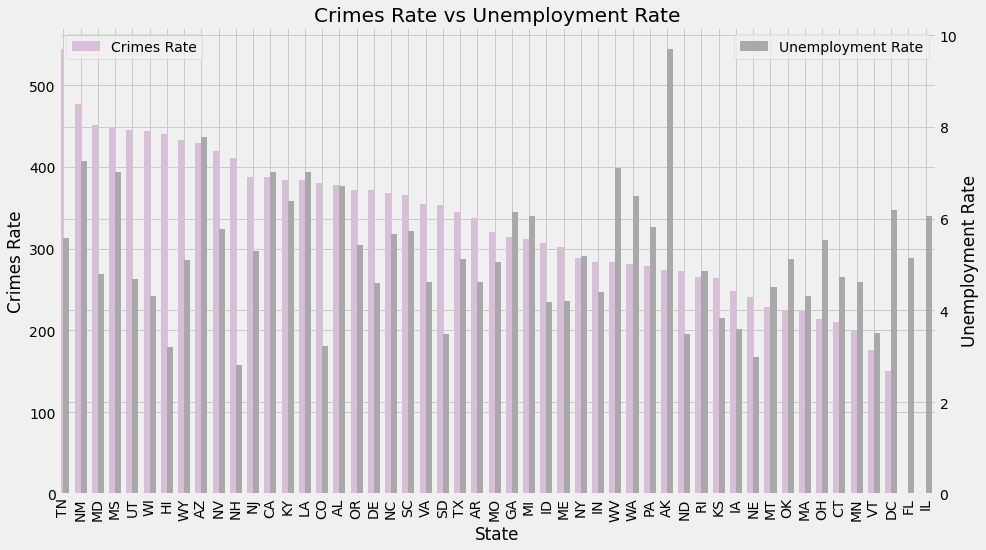

In [35]:
mlt.style.use('fivethirtyeight') 

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.35

df_state['Crimes Rate'].plot(kind='bar',  ax=ax, width=width, color='thistle', figsize=(14, 8),position=1)
df_state['Unemployment Rate'].plot(kind='bar', ax=ax2, width=width,color='darkgray', figsize=(14, 8),position=0)

ax.set_ylabel('Crimes Rate')
ax2.set_ylabel('Unemployment Rate')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_title('Crimes Rate vs Unemployment Rate')
plt.show()

Text(0, 0.5, 'Numbers of Crimes')

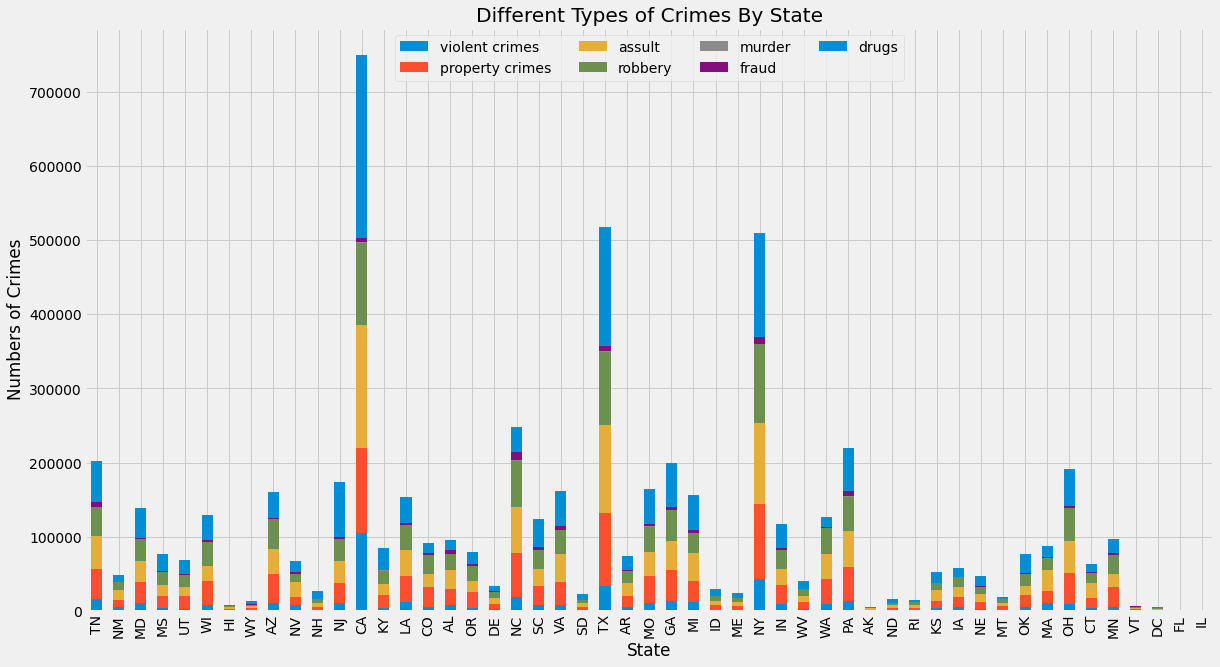

In [36]:
df_state[['violent crimes','property crimes','assult','robbery','murder','fraud','drugs']].plot(kind="bar", 
                                                                                                stacked=True,figsize=(18, 10)
).legend(loc='upper center', ncol=4)
plt.title("Different Types of Crimes By State")
plt.xlabel("State")
plt.ylabel("Numbers of Crimes")

Text(0, 0.5, 'drugs rate')

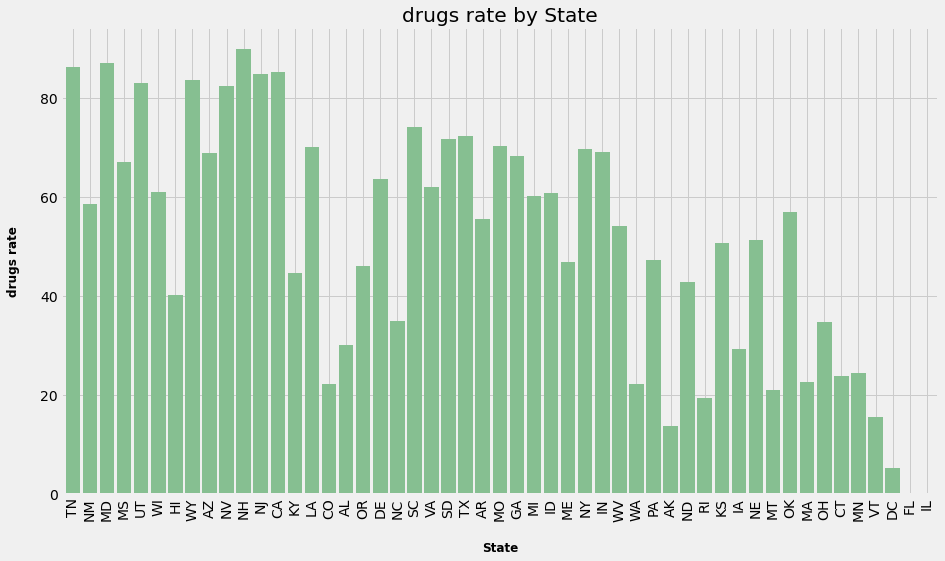

In [37]:
mlt.style.use('fivethirtyeight') 


ax=df_state['drugs rate'].plot(kind='bar', figsize=(14, 8), color='#86bf91', zorder=2, width=0.85)

ax.set_title("drugs rate by State")
ax.set_xlabel("State", labelpad=20, weight='bold', size=12)
ax.set_ylabel("drugs rate", labelpad=20, weight='bold', size=12)


In [38]:
df_state=df_state.reset_index()

(0.0, 17.0)

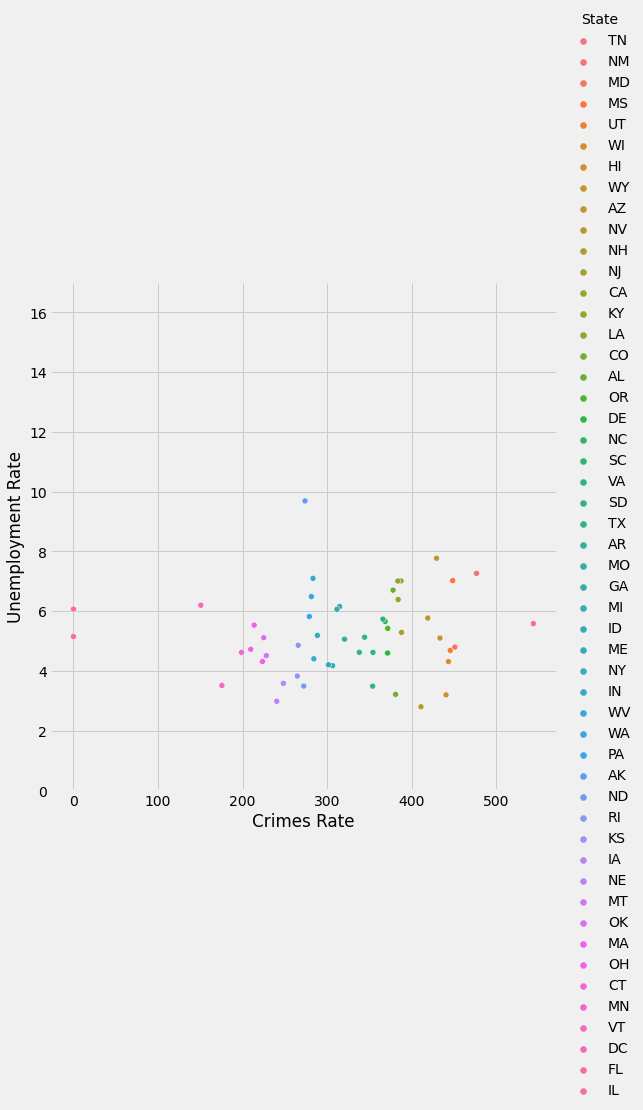

In [39]:
import seaborn as sns
sns.pairplot(x_vars=["Crimes Rate"], y_vars=["Unemployment Rate"], data= df_state, 
hue="State", height=8)
plt.gca().set_ylim((0, 17))

(20000.0, 85000.0)

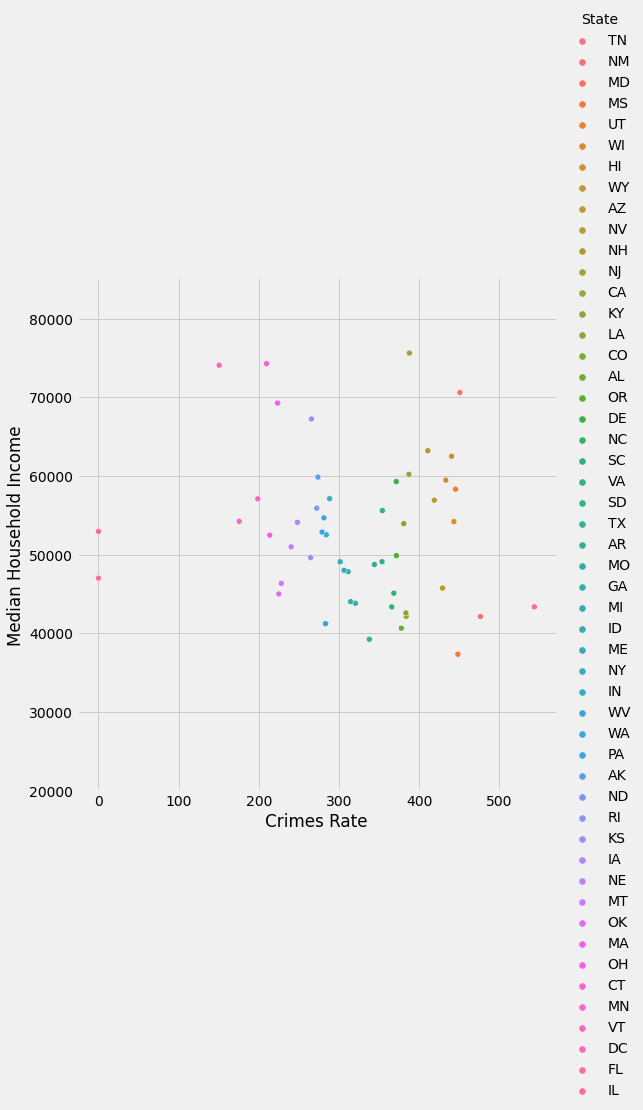

In [40]:
import seaborn as sns
sns.pairplot(x_vars=["Crimes Rate"], y_vars=["Median Household Income"], data= df_state, 
hue="State", height=8)
plt.gca().set_ylim((20000, 85000))

## generate dataset that can be imported into Spark MapReduce and SparkSQL

In [41]:
df2=df1.copy()
new_col_names = []
for i in df2.columns:
  if len(i.split(" ")) > 1:
    i = i.replace(" ","_")
  new_col_names.append(i)
df2.columns = new_col_names

In [42]:
#Convert data to json format and load it Hadoop
df2.to_csv("merged.csv",index = False)

In [43]:
merged_lines = open("merged.csv",'r',newline=None)

reader_merge = csv.DictReader(merged_lines, fieldnames = df2.columns)  
next(reader_merge)

OrderedDict([('FIPS', 'FIPS'),
             ('County', 'County'),
             ('State', 'State'),
             ('Total_Crimes', 'Total_Crimes'),
             ('Population', 'Population'),
             ('Median_Household_Income', 'Median_Household_Income'),
             ('Unemployment_Rate', 'Unemployment_Rate'),
             ('Poverty_Percent', 'Poverty_Percent'),
             ('violent_crimes', 'violent_crimes'),
             ('property_crimes', 'property_crimes'),
             ('assult', 'assult'),
             ('robbery', 'robbery'),
             ('murder', 'murder'),
             ('fraud', 'fraud'),
             ('drugs', 'drugs'),
             ('Crimes_Rate', 'Crimes_Rate'),
             ('violent_crimes_rate', 'violent_crimes_rate'),
             ('property_crimes_rate', 'property_crimes_rate'),
             ('assult_rate', 'assult_rate'),
             ('robbery_rate', 'robbery_rate'),
             ('murder_rate', 'murder_rate'),
             ('fraud_rate', 'fraud_rate'),
      

In [44]:
with open('merged2.json', 'w') as outfile:
  json.dump([ row for row in reader_merge ],outfile)